<a href="https://colab.research.google.com/github/ejarquin99/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# Make Explanatory Visualizations

### Objectives

- Student can identify the appropriate visualization type for a particular variable type and research question 
- Student can use Matplotlib to visualize distributions and relationships with continuous and discrete variables
- Student can add emphasis and annotations to transform visualizations from exploratory to explanatory
- Student can remove clutter from visualizations
- Student can identify misleading visualizations and how to fix them



Import the Titanic dataset and print the first 5 rows.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Titanic dataset from its URL:
Titanic = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Titanic/Titanic.csv')

Titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses_Aboard,Parents/Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [36]:
# Creating new DataFrame
Titanic_fare = Titanic.Fare.reset_index()

# Checking for Null Values
Titanic_fare.isnull().sum()

Titanic_fare = Titanic_fare.round(2)

Titanic_fare.head()

,index,Fare
0,0,7.25
1,1,71.28
2,2,7.92
3,3,53.10
4,4,8.05


###1) What is the appropriate type of graph to answer the question "What was the typical fare paid for passage on the Titanic?"



Histogram


In [22]:
print('Mean: ' + str(Titanic_fare['Fare'].mean()))
print('Max Value: ' + str(Titanic_fare['Fare'].max()))

Mean: 32.305569334836484
Max Value: 512.33


###2) Create the display you visualization you selected in 2).  Don't forget to name the axes and give the figure a title. 

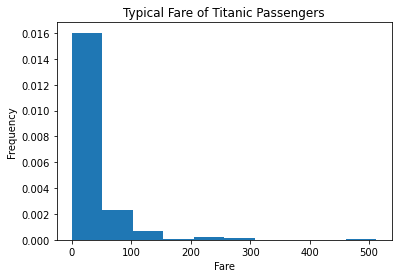

In [40]:
fig, ax = plt.subplots()

num_bins = 10
ax.hist(Titanic.Fare, num_bins, density=1)

ax.set_xlabel('Fare')
ax.set_ylabel('Frequency')
ax.set_title('Typical Fare of Titanic Passengers')

plt.show()

###3) Describe your results in a sentence or two.

It seems to me that the typical fair of the Titanic Passengers was some where between $0 to $50 dollars.

###4) Plot a histogram of fare paid by Titanic passengers by sex to see if there was a difference in fare paid between male and female passengers.  

In [126]:
Titanic_male = Titanic[Titanic['Sex'] == 'male']
Titanic_female = Titanic[Titanic['Sex'] == 'female']

print(Titanic_male)
print(Titanic_female)

     Survived  Pclass  ... Parents/Children_Aboard     Fare
0           0       3  ...                       0   7.2500
4           0       3  ...                       0   8.0500
5           0       3  ...                       0   8.4583
6           0       1  ...                       0  51.8625
7           0       3  ...                       1  21.0750
..        ...     ...  ...                     ...      ...
879         0       2  ...                       0  10.5000
880         0       3  ...                       0   7.0500
882         0       2  ...                       0  13.0000
885         1       1  ...                       0  30.0000
886         0       3  ...                       0   7.7500

[573 rows x 8 columns]
     Survived  Pclass  ... Parents/Children_Aboard     Fare
1           1       1  ...                       0  71.2833
2           1       3  ...                       0   7.9250
3           1       1  ...                       0  53.1000
8           1   

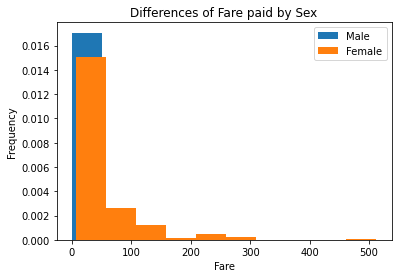

In [145]:
fig, ax = plt.subplots()

num_bins = 10
ax.hist(Titanic_male.Fare, num_bins,density=1, label='Male')
ax.hist(Titanic_female.Fare, num_bins,density=1, label='Female')
ax.set_xlabel('Fare')
ax.set_ylabel('Frequency')
ax.set_title('Differences of Fare paid by Sex')
ax.legend()
plt.show()

###5) Describe the difference in distribution of fare paid between male and female passengers.

They paid about the same.

###6) Make a bar plot to show the frequency of individuals in each passenger class.

In [167]:

Pclass1 = Titanic[Titanic['Pclass'] == 1]
Pclass2 = Titanic[Titanic['Pclass'] == 2]
Pclass3 = Titanic[Titanic['Pclass'] == 3]
print(Pclass1['Pclass'].value_counts())
print(Pclass2['Pclass'].value_counts())
print(Pclass3['Pclass'].value_counts())

first_class=216
second_class=184
third_class=487





1    216
Name: Pclass, dtype: int64
2    184
Name: Pclass, dtype: int64
3    487
Name: Pclass, dtype: int64


###7) Summarize your results from 6)

Answer here

###8) Create a graphical summary for the number of parents/ children on board for each passenger.

In [ ]:
#Code here

###9) Summarize your results from 8).  Did most individuals travel alone or with family?

Answer here

###In 10) - 14)  We will use figure, axes syntax to plot passenger survival by whether the passenger was a child or an adult. 

###10) Create a variable to categorize the passenger as a child (under age 18) or adult (18 years or older).

In [ ]:
#Code here

###11) Make a cross-tab of survival by age (child vs adult).

In [ ]:
#Code here

###12) Create a new data frame to hold the data for the figure.

In [ ]:
#Code here

,Child,Adult
0,65,480
1,65,277


###13) Adapt the plot from the Guided Project to show the relationship between passenger age (child vs adult) and survival.

In [ ]:
#Code here

###14) Summarize your results about passenger survival by age.

Answer here

#Project Milestone

Take some time to explore the links below.  Think about how we use graphics to answer research questions and how looking at visualizations can help us develop new lines of enquiry.  

By the end of the weekend, you should have a pretty good idea (though it can change!) what kind of data and visualizations you'd like to include in your Portfolio Project.

### Links

- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)